In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
G = nx.Graph()

In [2]:
# read data
df = pd.read_csv("cites.csv")
df_paper = pd.read_csv("paper.csv")

In [28]:
color_dict = {'Genetic_Algorithms':'green','Reinforcement_Learning':'teal','Theory':'purple','Rule_Learning':'pink','Case_Based':'yellow','Probabilistic_Methods':'orange','Neural_Networks':'blue'}
nodes_dict = {}

nodes_list = df_paper.apply(lambda x: [x[0],x[1]],axis=1)
for item in nodes_list:
  nodes_dict[item[0]] = item[1]

In [29]:
color_map=[]

for node in G:
  color_map.append(color_dict[nodes_dict[node]])

In [30]:
edges = list(df.apply(lambda x: (x[0],x[1]),axis=1))

In [31]:
G.add_edges_from(edges)

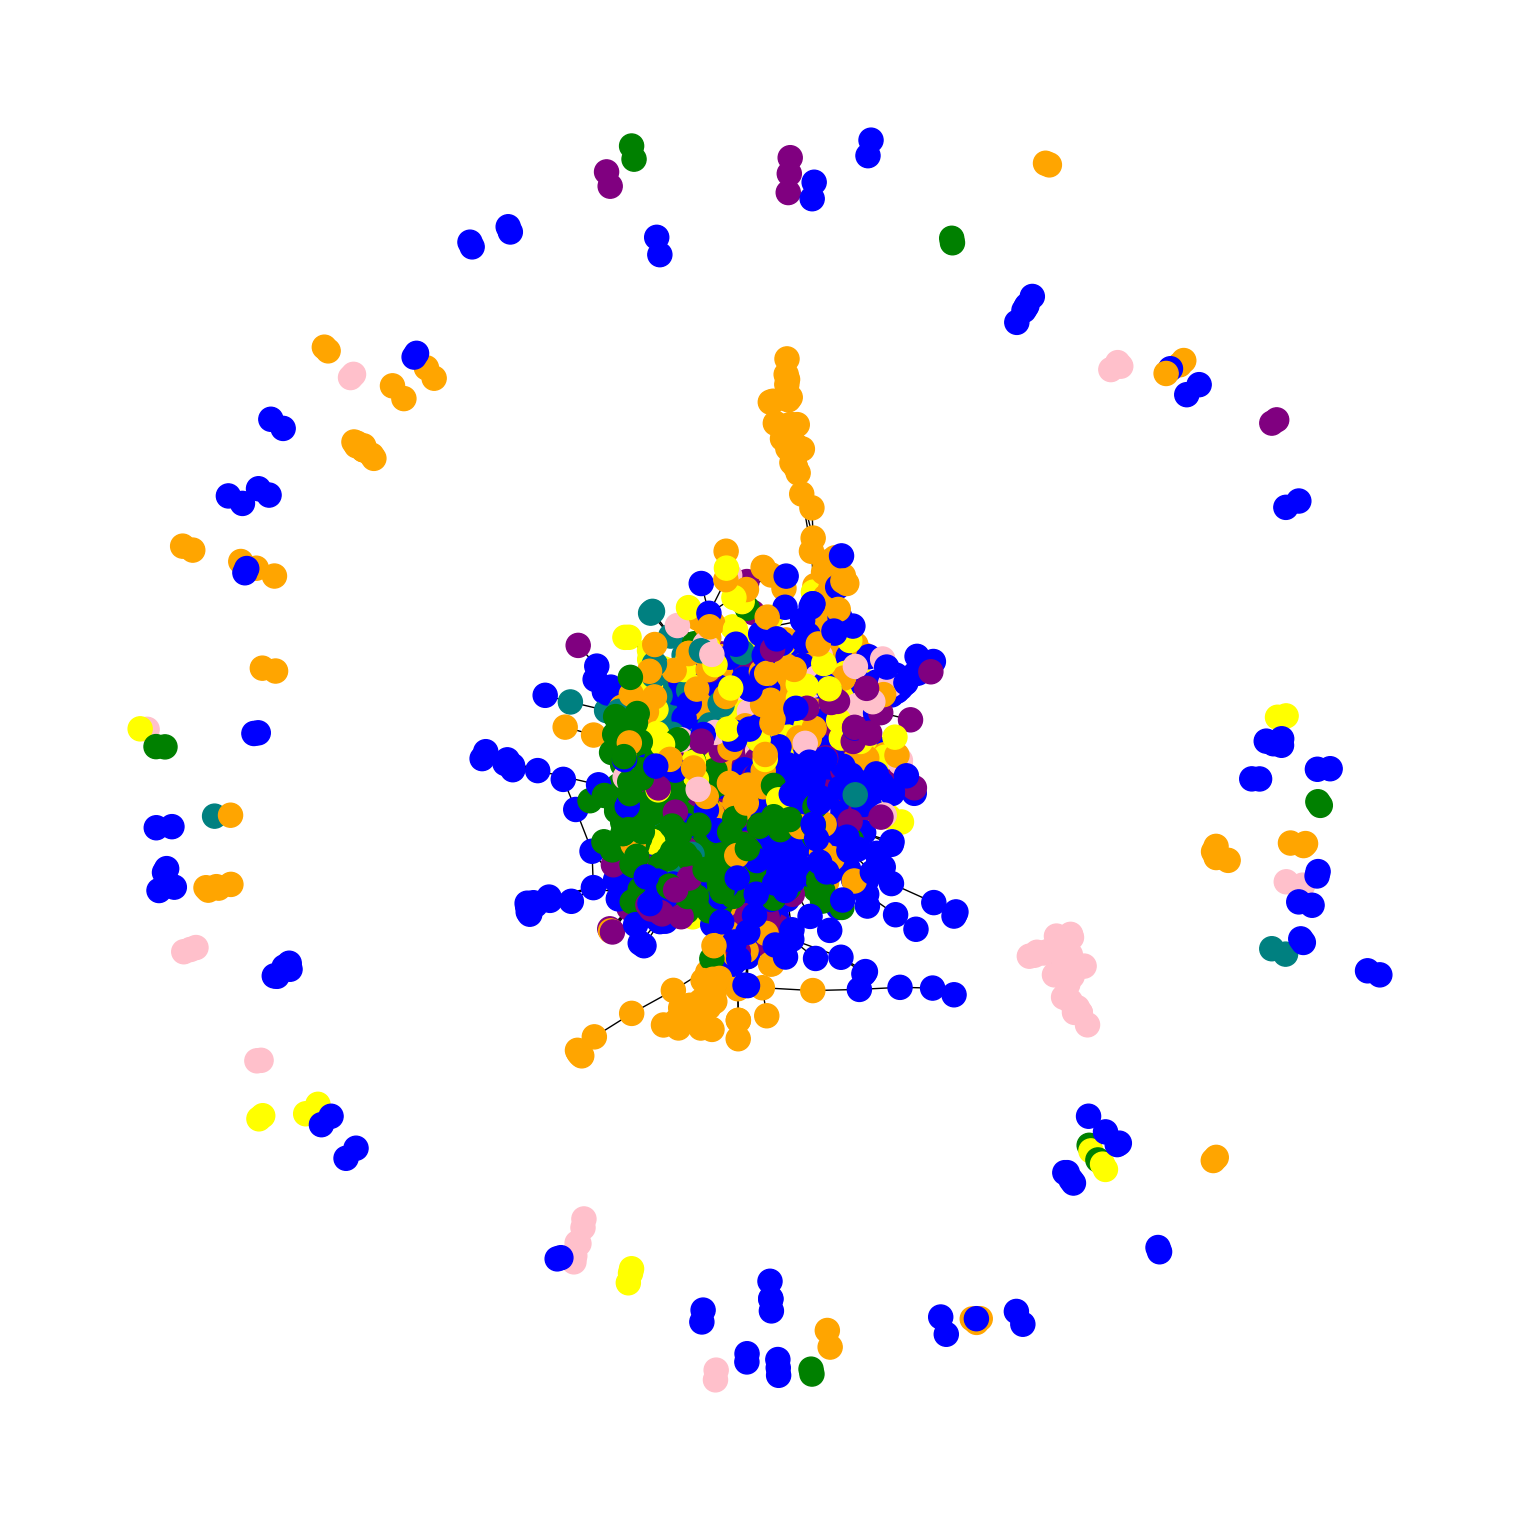

In [32]:
plt.figure(3,figsize=(15,15))
nx.draw(G, node_color=color_map)
plt.show()

In [9]:
G.number_of_nodes()

2708

In [10]:
depths_graph = nx.shortest_path_length(G)
max_clique_size = nx.algorithms.clique.graph_clique_number(G)
max_clique_size

<ipython-input-10-77fbc1afa416>:2: DeprecationWarning: 

graph_clique_number is deprecated and will be removed.
Use: ``max(len(c) for c in nx.find_cliques(G))`` instead.
  max_clique_size = nx.algorithms.clique.graph_clique_number(G)


5

In [11]:
import plotly.express as px

In [12]:
counts_df = df_paper.groupby('class_label').size().to_frame('count')

In [13]:
counts_df = counts_df.reset_index()

In [14]:
#fig = px.bar(counts_df,x='class_label', y='count',text_auto='.2s',title="Counts of papers in each class 1")
fig = px.pie(counts_df, values='count', names='class_label', title='Counts of papers in each class')
fig.update_traces(hoverinfo='label+percent', textinfo='value')
fig.show()

In [15]:
sorted_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:5]

In [16]:
for node in sorted_nodes:
  print(node,nodes_dict[node[0]])

(35, 168) Genetic_Algorithms
(6213, 78) Reinforcement_Learning
(1365, 74) Neural_Networks
(3229, 65) Neural_Networks
(910, 44) Neural_Networks


In [17]:
nx.algorithms.clique.graph_number_of_cliques(G)

<ipython-input-17-21d4a844d6df>:1: DeprecationWarning:



graph_number_of_cliques is deprecated and will be removed.
Use: ``sum(1 for _ in nx.find_cliques(G))`` instead.



3563

In [18]:
max_cliques = []
for clique in nx.find_cliques(G):
  if len(clique)==5:
     max_cliques.append(clique)

In [19]:
for max_clique in max_cliques:
  print("clique: ",max_clique)
  for node in max_clique:
    print(node,nodes_dict[node])

clique:  [8224, 22431, 49843, 49844, 49847]
8224 Theory
22431 Rule_Learning
49843 Rule_Learning
49844 Rule_Learning
49847 Rule_Learning
clique:  [1122642, 34257, 34266, 34263, 90655]
1122642 Neural_Networks
34257 Neural_Networks
34266 Neural_Networks
34263 Neural_Networks
90655 Neural_Networks
clique:  [1123188, 6910, 12638, 12631, 662416]
1123188 Neural_Networks
6910 Neural_Networks
12638 Neural_Networks
12631 Neural_Networks
662416 Probabilistic_Methods
clique:  [1123188, 6910, 12638, 12631, 6898]
1123188 Neural_Networks
6910 Neural_Networks
12638 Neural_Networks
12631 Neural_Networks
6898 Neural_Networks
clique:  [124064, 6213, 6224, 6163, 6220]
124064 Reinforcement_Learning
6213 Reinforcement_Learning
6224 Reinforcement_Learning
6163 Reinforcement_Learning
6220 Reinforcement_Learning
clique:  [10435, 1103394, 22563, 22564, 22566]
10435 Case_Based
1103394 Case_Based
22563 Neural_Networks
22564 Case_Based
22566 Case_Based
clique:  [10531, 31353, 686532, 31349, 31336]
10531 Neural_Net

In [20]:
len(max_cliques)

9

In [21]:
paper_cites_counts = df.groupby('cited_paper_id').size().to_frame('degree').reset_index()

In [22]:
def add_degree(row):
  global paper_cites_counts
  # print(row['paper_id'])
  degree_list = paper_cites_counts.loc[paper_cites_counts['cited_paper_id']==row['paper_id'],'degree'].tolist()
  if len(degree_list) != 1:
    return 0
  return degree_list[0]

In [23]:
df_paper['degree'] = 0

In [24]:
df_paper['degree'] = df_paper.apply(add_degree, axis=1)

In [25]:
df_paper.to_csv("paper_with_degree.csv",index=False)

In [26]:
len(paper_cites_counts['cited_paper_id'].unique())

1565

In [27]:
len(df['citing_paper_id'].unique())

2222